In [6]:
!pip install langchain_community langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.9/415.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.4/567.4 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.4 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.61.1
    Uninstalling openai-1.61.1:
      Successfully uninstalled openai-1.61.1
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.44
    Uninstalling langchain-core-0.3.44:
      Successfully uninstalled langchain-core-0.3.44


In [2]:
from google.colab import userdata
import os

OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

#Text Summarization Using Langchain

In [3]:
## Basic Prompt Summarization
from langchain.chat_models import ChatOpenAI
from langchain.schema import(
    AIMessage,
    HumanMessage,
    SystemMessage
)

In [4]:
speech="""
People across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.

In our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the government offices for this purpose. The government should reach him. Since you have assigned this responsibility to me, about four crore families have got their ‘pucca’ houses. However, I have encountered cases where someone is left out of the government benefits. Therefore, I have decided to tour the country again, to listen to people’s experiences with government schemes, to understand whether they received the intended benefits, and to ensure that the programs are reaching everyone as planned without paying any bribes. We will get the real picture if we visit them again. Therefore, this ‘Viksit Bharat Sankalp Yatra’ is, in a way, my own examination. I want to hear from you and the people across the country whether what I envisioned and the work I have been doing aligns with reality and whether it has reached those for whom it was meant.

It is crucial to check whether the work that was supposed to happen has indeed taken place. I recently met some individuals who utilized the Ayushman card to get treatment for serious illnesses. One person met with a severe accident, and after using the card, he could afford the necessary operation, and now he is recovering well. When I asked him, he said: “How could I afford this treatment? Now that there is the Ayushman card, I mustered courage and underwent an operation. Now I am perfectly fine.”  Such stories are blessings to me.

The bureaucrats, who prepare good schemes, expedite the paperwork and even allocate funds, also feel satisfied that 50 or 100 people who were supposed to get the funds have got it. The funds meant for a thousand villages have been released. But their job satisfaction peaks when they hear that their work has directly impacted someone’s life positively. When they see the tangible results of their efforts, their enthusiasm multiplies. They feel satisfied. Therefore, ‘Viksit Bharat Sankalp Yatra’ has had a positive impact on government officers. It has made them more enthusiastic about their work, especially when they witness the tangible benefits reaching the people. Officers now feel satisfied with their work, saying, “I made a good plan, I created a file, and the intended beneficiaries received the benefits.” When they find that the money has reached a poor widow under the Jeevan Jyoti scheme and it was a great help to her during her crisis, they realise that they have done a good job. When a government officer listens to such stories, he feels very satisfied.

There are very few who understand the power and impact of the ‘Viksit Bharat Sankalp Yatra’. When I hear people connected to bureaucratic circles talking about it, expressing their satisfaction, it resonates with me. I’ve heard stories where someone suddenly received 2 lakh rupees after the death of her husband, and a sister mentioned how the arrival of gas in her home transformed her lives. The most significant aspect is when someone says that the line between rich and poor has vanished. While the slogan ‘Garibi Hatao’ (Remove Poverty) is one thing, but the real change happens when a person says, “As soon as the gas stove came to my house, the distinction between poverty and affluence disappeared.
"""

In [5]:
chat_messages=[
    SystemMessage(content='You are an expert assistant with expertize in summarizing speeches'),
    HumanMessage(content=f'Please provide a short and concise summary of the following speech:\n TEXT: {speech}')
]

In [7]:
from langchain_openai import ChatOpenAI

llm=ChatOpenAI(model_name='gpt-3.5-turbo')

In [8]:
##total tokens
llm.get_num_tokens(speech)

866

In [9]:
response = llm.invoke(chat_messages)

In [10]:
response

AIMessage(content="The speech highlights the importance of ensuring government schemes reach the intended beneficiaries seamlessly. The speaker, a Member of Parliament, discusses the impact of the 'Viksit Bharat Sankalp Yatra' in reaching people and ensuring programs benefit all without corruption. The success stories from individuals who benefitted from schemes like the Ayushman card demonstrate the tangible impact on people's lives. The speech also emphasizes the satisfaction of bureaucrats when they witness the positive outcomes of their work and how the Yatra enhances their enthusiasm for serving the people. Ultimately, the aim is to bridge the gap between rich and poor through efficient implementation of government programs.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 127, 'prompt_tokens': 903, 'total_tokens': 1030, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_p

In [11]:
##get_summary
print(response.content)

The speech highlights the importance of ensuring government schemes reach the intended beneficiaries seamlessly. The speaker, a Member of Parliament, discusses the impact of the 'Viksit Bharat Sankalp Yatra' in reaching people and ensuring programs benefit all without corruption. The success stories from individuals who benefitted from schemes like the Ayushman card demonstrate the tangible impact on people's lives. The speech also emphasizes the satisfaction of bureaucrats when they witness the positive outcomes of their work and how the Yatra enhances their enthusiasm for serving the people. Ultimately, the aim is to bridge the gap between rich and poor through efficient implementation of government programs.


#Prompt Templates Text Summarization

In [12]:
from langchain.chains import LLMChain
from langchain import PromptTemplate

In [13]:
generic_template='''
Write a summary of the following speech:
Speech : `{speech}`
Translate the precise summary to {language}.

'''
prompt=PromptTemplate(
    input_variables=['speech','language'],
    template=generic_template
)

In [14]:
prompt.format(speech=speech,language='Hindi')

'\nWrite a summary of the following speech:\nSpeech : `\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their hou

In [15]:
complete_prompt=prompt.format(speech=speech,language='Hindi')

In [16]:
llm.get_num_tokens(complete_prompt)

885

In [17]:
llm_chain=LLMChain(llm=llm,prompt=prompt)

<ipython-input-17-a14733407ec3>:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain=LLMChain(llm=llm,prompt=prompt)


In [18]:
summary_hindu=llm_chain.invoke({'speech':speech,'language':'hindi'})

In [20]:
summary_hindu

{'speech': '\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds 

In [21]:
type(summary_hindu)

dict

In [22]:
summary_hindu['language']

'hindi'

In [23]:
summary_hindu['text']

'भारत निर्मिति की इस खोज में, सरकारी अधिकारियों और राजनीतिक और सामाजिक गतिविधियों में जुटे लोग अपना समय समर्पित कर रहे हैं ताकि ‘विकसित भारत संकल्प यात्रा’ सफल हो सके। इसलिए, संसद के सदस्य के रूप में, इस कार्यक्रम में अपना समय देना मेरी जिम्मेदारी थी। मैं आज यहाँ केवल एक सांसद और आपका ‘सेवक’ के रूप में आया हूँ, इस कार्यक्रम में भाग लेने के लिए, बिल्कुल जैसे आप लोग हैं।\n\nअपने देश में, कई सरकारें आई और चली गई हैं, अनेक योजनाएं बनाई गई हैं, चर्चाएँ हुई हैं, बड़े वादे किए गए हैं। मेरे अनुभव और अवलोकन ने मुझे यह महसूस कराया कि जो सबसे महत्वपूर्ण विवरण है उसे ध्यान से ध्यान देना है यह सुनिश्चित करना कि सरकार की योजनाएं तक पहुंच पाने के लिए कोई कठिनाइयाँ न हों। अगर ‘प्रधानमंत्री आवास योजना’ है, तो उन्हें उन लोगों को चाहिए जो झुग्गियों और झोपड़ीमें रहते हैं, उन्हें उनके घर मिलें। और इसके लिए उसे सरकारी कार्यालयों की चक्कर नहीं काटनी चाहिए। सरकार को वही पहुंचनी चाहिए। जिन्होंने मुझे यह जिम्मेदारी सौंपी है, उन्होंने लगभग चार करोड़ परिवारों को उनके ‘पुक्के’ घर मिला है। हालांकि, मुझे उन मामलों स

In [19]:
print(summary_hindu)

{'speech': '\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds 

In [26]:
summary_telugu=llm_chain.invoke({'speech':speech,'language':'telugu'})

In [27]:
summary_telugu['language']

'telugu'

In [28]:
summary_telugu['text']

"ఈ స్పీచ్ నుండి నిబంధన లో ఈ పరిపాలనకు చేరిన ప్రజలు, ప్రభుత్వం, రాజకీయ, సామాజిక కార్యకలాపాలలో ఈ 'విక్షిత్ భారత్ సంకల్ప యాత్ర' విజయవంతం చేయడానికి తమ సమయాన్ని అర్పించారు. కాబట్టి, పార్లమెంటు సభలో మెంబర్ గా, నేను ఇక్కడ వచ్చి మీరు అనేక విధాల లో, ప్రోగ్రామ్\u200cలలో పార్టిసిపేట్ చేయడాన్ని రీతిలో మీకు సాయం చేయటం నా కర్తవ్యం. దీనికి అనేకిన ప్రాణం సమర్పించుటకు నా కృషి ఉంది. మనదార్శికత మరీనా అనేక కేంద్రాలు అయ్యాయి. మనదార్శికత మరీ బాగా క్రియాశృంఖలలు అయ్యాయి. కింది సంవాదాలు జరిగాయి. మరిలుబాటులు అందించినవి. మరీ బడుగులు అందించే వారం చాలా ప్రజాస్వామ్యం పెట్టడం జరిగే అధ్యతనం కనీసం ప్రముఖం. ఎందుకంటే? ప్రభుత్వ యోజనలు సరొహావడం. యోజనలు కంటికి వెళ్యి ఉండి వెళ్లది. ఎదవైనా 'ప్రధాని ఆవాసు యోజన' ఉంటే పిండులో ఉన్నవారు తమ ఇంట్లో ఉంటుంటేనే తమ ఇంటికి రవడం లేదు. ప్రభుత్వం మనకు చేయాలి. అవిని. మీరు ఈ జవాను నాకు అసెుందాను, చర్చలను జరిగించాను. ఇమిరు విభాగాలో ఉన్న అనేకికి క్రియాకలాపాలు అందుచూ  వృద్దికి పాత కోట్లు చెందినారు. కానీ, వచ్చిన వ్యధికి చికతి లభించడం కనీసం కొన్ని వ్యక్తులతో భట్టింగా జరుగుతుంది. అవి ఆశిషాలతో ఉంటా

In [29]:
print(summary_telugu)

{'speech': '\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds 

#StuffDocumentChain Text Summarization

In [30]:
!pip install pypdf2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.8 MB/s eta 0:00:00


In [31]:
from PyPDF2 import PdfReader

In [32]:
# provide the path of  pdf file/files.
pdfreader = PdfReader('apjspeech.pdf')

In [33]:
from typing_extensions import Concatenate
# read text from pdf
text = ''
for i, page in enumerate(pdfreader.pages):
    content = page.extract_text()
    if content:
        text += content

In [34]:
text

'A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowing important messages: \n \n1. Accelerate development : Aspiration of th

In [35]:
from langchain.docstore.document import Document

In [36]:
docs = [Document(page_content=text)]

In [37]:
docs

[Document(metadata={}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowing important messages: \n \n1. Accel

In [38]:
llm = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo')

In [39]:
from langchain import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.chains.summarize import load_summarize_chain
from langchain.docstore.document import Document

In [40]:
template = '''Write a concise and short summary of the following speech.
Speech: `{text}`
'''
prompt = PromptTemplate(
    input_variables=['text'],
    template=template
)

In [41]:
chain = load_summarize_chain(
    llm,
    chain_type='stuff',
    prompt=prompt,
    verbose=False
)

In [42]:
output_summary = chain.invoke(docs)

In [43]:
output_summary

{'input_documents': [Document(metadata={}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowing important mes

#Summarizing Large Documents Using Map Reduce

In [47]:
from langchain import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain.chains.summarize import load_summarize_chain
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [48]:
# provide the path of  pdf file/files.
pdfreader = PdfReader('apjspeech.pdf')
from typing_extensions import Concatenate
# read text from pdf
text = ''
for i, page in enumerate(pdfreader.pages):
    content = page.extract_text()
    if content:
        text += content

In [49]:
llm = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo')

In [50]:
llm.get_num_tokens(text)

4001

In [51]:
## Splittting the text
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=20)
chunks = text_splitter.create_documents([text])

In [52]:
len(chunks)

2

In [53]:
chain = load_summarize_chain(
    llm,
    chain_type='map_reduce',
    verbose=False
)

In [54]:
summary = chain.invoke(chunks)

In [55]:
summary

{'input_documents': [Document(metadata={}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowing important mes

#Map Reduce With Custom Prompts

In [56]:
chunks_prompt="""
Please summarize the below speech:
Speech:`{text}'
Summary:
"""
map_prompt_template=PromptTemplate(input_variables=['text'],
                                    template=chunks_prompt)

In [57]:
final_combine_prompt='''
Provide a final summary of the entire speech with these important points.
Add a Generic Motivational Title,
Start the precise summary with an introduction and provide the
summary in number points for the speech.
Speech: `{text}`
'''
final_combine_prompt_template=PromptTemplate(input_variables=['text'],
                                             template=final_combine_prompt)

In [58]:
summary_chain = load_summarize_chain(
    llm=llm,
    chain_type='map_reduce',
    map_prompt=map_prompt_template,
    combine_prompt=final_combine_prompt_template,
    verbose=False
)

In [59]:
output = summary_chain.invoke(chunks)

In [60]:
output

{'input_documents': [Document(metadata={}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowing important mes

#RefineChain For Summarization

In [61]:
chain = load_summarize_chain(
    llm=llm,
    chain_type='refine',
    verbose=True
)

In [62]:
output_summary = chain.invoke(chunks)



> Entering new RefineDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have man

In [63]:
output_summary

{'input_documents': [Document(metadata={}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowing important mes

In [64]:
print(output_summary)

{'input_documents': [Document(metadata={}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowing important mes

In [68]:
output_summary['input_documents']

[Document(metadata={}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowing important messages: \n \n1. Accel

In [67]:
output_summary['output_text']

'In his departing speech, A P J Abdul Kalam reflects on his five years as President, highlighting key messages such as accelerating development, empowering villages, mobilizing rural core competence, and overcoming challenges through partnership. He shares experiences from interactions with youth, farmers, physically challenged individuals, and communities affected by disasters, emphasizing the importance of aspiration, perseverance, and courage in achieving national growth and development. Additionally, he discusses initiatives such as the Pan African e-Network for societal transformation, his experiences defending the nation, and the Youth movement for Developed India 2020. Kalam expresses his admiration for the diversity and unity of India, emphasizing the need to preserve cultural treasures while pursuing economic growth. He envisions a developed India by 2020 with a focus on reducing rural-urban divide, equitable access to energy and water, collaboration between sectors, inclusive

#Q&A: Stuff

In [69]:
#from langchain.chains import load_qa_chain
from langchain.chains.question_answering import load_qa_chain
from langchain_openai import OpenAI
from langchain.document_loaders import TextLoader

# Example text document
#docs = [{"page_content": "Generative AI models, like GPT and DALL-E, are transforming industries by generating creative content and automating tasks."}]
docs = [Document(page_content="Generative AI models, like GPT and DALL-E, are transforming industries by generating creative content and automating tasks.")]

# Initialize LLM
llm = OpenAI(openai_api_key=OPENAI_API_KEY)

# Load QA chain
qa_chain = load_qa_chain(llm, chain_type="stuff")

<ipython-input-69-112f67244bba>:14: LangChainDeprecationWarning: This class is deprecated. See the following migration guides for replacements based on `chain_type`:
stuff: https://python.langchain.com/docs/versions/migrating_chains/stuff_docs_chain
map_reduce: https://python.langchain.com/docs/versions/migrating_chains/map_reduce_chain
refine: https://python.langchain.com/docs/versions/migrating_chains/refine_chain
map_rerank: https://python.langchain.com/docs/versions/migrating_chains/map_rerank_docs_chain

See also guides on retrieval and question-answering here: https://python.langchain.com/docs/how_to/#qa-with-rag
  qa_chain = load_qa_chain(llm, chain_type="stuff")


In [70]:
# Ask a question based on the document
question = "What are Generative AI models used for?"

In [71]:
answer = qa_chain.invoke({"input_documents": docs, "question": question})

In [72]:
print("Answer:", answer)

Answer: {'input_documents': [Document(metadata={}, page_content='Generative AI models, like GPT and DALL-E, are transforming industries by generating creative content and automating tasks.')], 'question': 'What are Generative AI models used for?', 'output_text': '\nGenerative AI models are used for generating creative content and automating tasks.'}


In [73]:
answer['question']

'What are Generative AI models used for?'

In [75]:
print(answer['output_text'])


Generative AI models are used for generating creative content and automating tasks.


#Q&A: Reduce

In [76]:
qa_chain = load_qa_chain(llm, chain_type="map_reduce")

In [77]:
answer = qa_chain.invoke({"input_documents": docs, "question": question})

In [79]:
answer['question']

'What are Generative AI models used for?'

In [80]:
answer['output_text']

' Generative AI models are used for transforming industries by generating creative content and automating tasks.'

In [78]:
print("Answer with Map-Reduce Chain:", answer)

Answer with Map-Reduce Chain: {'input_documents': [Document(metadata={}, page_content='Generative AI models, like GPT and DALL-E, are transforming industries by generating creative content and automating tasks.')], 'question': 'What are Generative AI models used for?', 'output_text': ' Generative AI models are used for transforming industries by generating creative content and automating tasks.'}


#Q&A: Refine

In [81]:
qa_chain = load_qa_chain(llm, chain_type="refine")

In [82]:
answer = qa_chain.invoke({"input_documents": docs, "question": question})

In [84]:
answer['question']

'What are Generative AI models used for?'

In [85]:
answer['output_text']

'\nGenerative AI models are used for transforming industries by generating creative content and automating tasks.'

In [83]:
print("Answer with Refine Chain:", answer)

Answer with Refine Chain: {'input_documents': [Document(metadata={}, page_content='Generative AI models, like GPT and DALL-E, are transforming industries by generating creative content and automating tasks.')], 'question': 'What are Generative AI models used for?', 'output_text': '\nGenerative AI models are used for transforming industries by generating creative content and automating tasks.'}


#Q&A: Map Re-Rank

In [86]:
chain = load_qa_chain(llm, chain_type="map_rerank", verbose=True, return_intermediate_steps=True)

In [87]:
query = "Who was the authors friend who he got permission from to use the IBM 1401?"

In [88]:
result = chain.invoke({"input_documents": docs, "question": query}, return_only_outputs=True)



> Entering new MapRerankDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

In addition to giving an answer, also return a score of how fully it answered the user's question. This should be in the following format:

Question: [question here]
Helpful Answer: [answer here]
Score: [score between 0 and 100]

How to determine the score:
- Higher is a better answer
- Better responds fully to the asked question, with sufficient level of detail
- If you do not know the answer based on the context, that should be a score of 0
- Don't be overconfident!

Example #1

Context:
---------
Apples are red
---------
Question: what color are apples?
Helpful Answer: red
Score: 100

Example #2

Context:
---------
it was night and the witness forgot his glasses. he was not sure if it was a sports car or an suv
--

/usr/local/lib/python3.11/dist-packages/langchain/chains/llm.py:369: UserWarning: The apply_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(



> Finished chain.

> Finished chain.


In [89]:
result

{'intermediate_steps': [{'answer': ' Sorry, I do not have enough information to answer your question.',
   'score': '0'}],
 'output_text': ' Sorry, I do not have enough information to answer your question.'}

In [90]:
result['output_text']

' Sorry, I do not have enough information to answer your question.'

In [91]:
result['intermediate_steps']

[{'answer': ' Sorry, I do not have enough information to answer your question.',
  'score': '0'}]

#Q&A: VectorDB

In [98]:
!pip install pypdf faiss_cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 44.4 MB/s eta 0:00:00


In [100]:
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import VectorDBQA
from langchain.llms import OpenAI
from langchain.text_splitter import CharacterTextSplitter
from langchain.document_loaders import PyPDFLoader

# Assume vector_store already exists as in the previous example
llm = OpenAI(temperature=0)

# Load documents and create embeddings
loader = PyPDFLoader('apjspeech.pdf') # replace with the path to your actual document
documents = loader.load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.split_documents(documents)
embeddings = OpenAIEmbeddings()
vector_store = FAISS.from_documents(docs, embeddings)



In [104]:
# Create the VectorDBQA chain
qa_chain = VectorDBQA.from_chain_type(llm=llm, chain_type="stuff", vectorstore=vector_store                                      )

query = "What are the applications of Generative AI?"


/usr/local/lib/python3.11/dist-packages/langchain/chains/retrieval_qa/base.py:316: UserWarning: `VectorDBQA` is deprecated - please use `from langchain.chains import RetrievalQA`
  warnings.warn(


In [105]:
result = qa_chain.invoke(query)

In [106]:
result

{'query': 'What are the applications of Generative AI?',
 'result': ' Generative AI has a wide range of applications, including:\n\n1. Content Creation: Generative AI can be used to create original content such as images, videos, and text. This can be useful for artists, designers, and content creators who need a constant stream of new and unique content.\n\n2. Chatbots and Virtual Assistants: Generative AI can be used to create chatbots and virtual assistants that can interact with users in a natural and human-like manner. This can be useful for customer service, information retrieval, and other tasks.\n\n3. Personalization: Generative AI can be used to personalize content and recommendations for users based on their preferences and behavior. This can be useful for e-commerce, marketing, and other industries.\n\n4. Gaming: Generative AI can be used to create realistic and dynamic environments, characters, and gameplay in video games. This can enhance the gaming experience and make it 

In [107]:
result['query']

'What are the applications of Generative AI?'

In [108]:
result['result']

' Generative AI has a wide range of applications, including:\n\n1. Content Creation: Generative AI can be used to create original content such as images, videos, and text. This can be useful for artists, designers, and content creators who need a constant stream of new and unique content.\n\n2. Chatbots and Virtual Assistants: Generative AI can be used to create chatbots and virtual assistants that can interact with users in a natural and human-like manner. This can be useful for customer service, information retrieval, and other tasks.\n\n3. Personalization: Generative AI can be used to personalize content and recommendations for users based on their preferences and behavior. This can be useful for e-commerce, marketing, and other industries.\n\n4. Gaming: Generative AI can be used to create realistic and dynamic environments, characters, and gameplay in video games. This can enhance the gaming experience and make it more immersive.\n\n5. Music and Sound Generation: Generative AI can 

#Levels Of Summarization

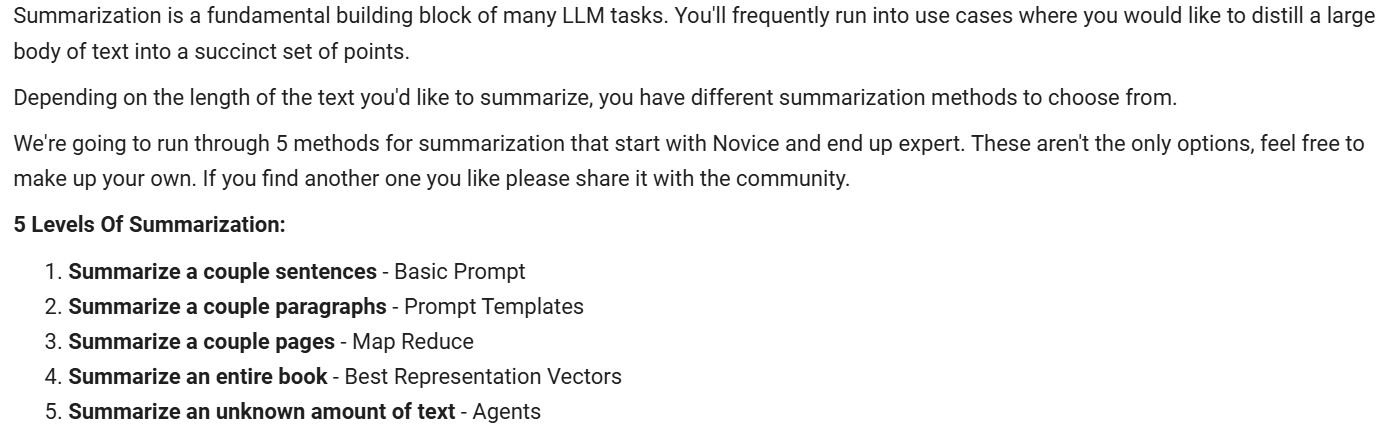

In [109]:
!pip install tiktoken

##Level 1: Basic Prompt - Summarize a couple sentences

In [110]:
from langchain import OpenAI

import warnings
warnings.filterwarnings("ignore")

In [111]:
llm = OpenAI(temperature=0, openai_api_key=OPENAI_API_KEY)

In [112]:
prompt = """
Please provide a summary of the following text

TEXT:
Philosophy (from Greek: φιλοσοφία, philosophia, 'love of wisdom') \
is the systematized study of general and fundamental questions, \
such as those about existence, reason, knowledge, values, mind, and language. \
Some sources claim the term was coined by Pythagoras (c. 570 – c. 495 BCE), \
although this theory is disputed by some. Philosophical methods include questioning, \
critical discussion, rational argument, and systematic presentation.
"""

In [113]:
num_tokens = llm.get_num_tokens(prompt)
print (f"Our prompt has {num_tokens} tokens")

Our prompt has 115 tokens


In [114]:
output = llm.invoke(prompt)

In [115]:
output

'\nPhilosophy is the study of fundamental questions about existence, reason, knowledge, values, mind, and language. The term was possibly coined by Pythagoras, but this is debated. Philosophical methods involve questioning, critical discussion, rational argument, and systematic presentation.'

In [116]:
print (output)


Philosophy is the study of fundamental questions about existence, reason, knowledge, values, mind, and language. The term was possibly coined by Pythagoras, but this is debated. Philosophical methods involve questioning, critical discussion, rational argument, and systematic presentation.


In [117]:
prompt = """
Please provide a summary of the following text.
Please provide your output in a manner that a 5 year old would understand

TEXT:
Philosophy (from Greek: φιλοσοφία, philosophia, 'love of wisdom') \
is the systematized study of general and fundamental questions, \
such as those about existence, reason, knowledge, values, mind, and language. \
Some sources claim the term was coined by Pythagoras (c. 570 – c. 495 BCE), \
although this theory is disputed by some. Philosophical methods include questioning, \
critical discussion, rational argument, and systematic presentation.
"""

In [118]:
num_tokens = llm.get_num_tokens(prompt)
print (f"Our prompt has {num_tokens} tokens")

Our prompt has 131 tokens


In [119]:
output = llm.invoke(prompt)

In [120]:
print (output)


Philosophy is when people think really hard about big questions like why we exist, how we know things, and what is important. Some people say a guy named Pythagoras made up the word, but not everyone agrees. Philosophers use different ways to try and answer these questions, like asking lots of questions, talking about it with others, using good reasons, and organizing their ideas.


##Level 2: Prompt Templates - Summarize a couple paragraphs

In [121]:
from langchain import OpenAI
from langchain import PromptTemplate
import os

In [122]:
paul_graham_essays = ['/content/getideas.txt', '/content/noob.txt']

essays = []

for file_name in paul_graham_essays:
    with open(file_name, 'r') as file:
        essays.append(file.read())

In [123]:
for i, essay in enumerate(essays):
    print (f"Essay #{i+1}: {essay[:300]}\n")

Essay #1: January 2023(Someone fed my essays into GPT to make something that could answer
questions based on them, then asked it where good ideas come from.  The
answer was ok, but not what I would have said. This is what I would have said.)The way to get new ideas is to notice anomalies: what seems strange,


Essay #2: January 2020When I was young, I thought old people had everything figured out.
Now that I'm old, I know this isn't true.I constantly feel like a noob. It seems like I'm always talking to
some startup working in a new field I know nothing about, or reading
a book about a topic I don't understand well



In [124]:
template = """
Please write a one sentence summary of the following text:

{essay}
"""

prompt = PromptTemplate(
    input_variables=["essay"],
    template=template
)

In [125]:
for essay in essays:
    summary_prompt = prompt.format(essay=essay)

    num_tokens = llm.get_num_tokens(summary_prompt)
    print (f"This prompt + essay has {num_tokens} tokens")

    summary = llm.invoke(summary_prompt)

    print (f"Summary: {summary.strip()}")
    print ("\n")

This prompt + essay has 199 tokens
Summary: The key to generating new ideas is to identify anomalies, especially at the frontiers of knowledge, which can lead to new and innovative discoveries.


This prompt + essay has 493 tokens
Summary: Feeling like a noob can actually be beneficial in the long run, as it indicates a willingness to learn and adapt to new situations.




##Level 3: Map Reduce - Summarize a couple pages multiple pages

In [126]:
from langchain import OpenAI
from langchain.chains.summarize import load_summarize_chain
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [127]:
paul_graham_essay = '/content/startupideas.txt'

with open(paul_graham_essay, 'r') as file:
    essay = file.read()

In [128]:
llm.get_num_tokens(essay)

6352

In [129]:
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n"], chunk_size=10000, chunk_overlap=500)

docs = text_splitter.create_documents([essay])

In [130]:
num_docs = len(docs)

num_tokens_first_doc = llm.get_num_tokens(docs[0].page_content)

print (f"Now we have {num_docs} documents and the first one has {num_tokens_first_doc} tokens")

Now we have 3 documents and the first one has 1774 tokens


In [131]:
summary_chain = load_summarize_chain(llm=llm, chain_type='map_reduce',
                                     verbose=True # Set verbose=True if you want to see the prompts being used
                                    )

In [132]:
output = summary_chain.invoke(docs)



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"April 2006(This essay is derived from a talk at the 2006 
Startup School.)The startups we've funded so far are pretty quick, but they seem
quicker to learn some lessons than others.  I think it's because
some things about startups are kind of counterintuitive.We've now 
invested 
in enough companies that I've learned a trick
for determining which points are the counterintuitive ones:
they're the ones I have to keep repeating.So I'm going to number these points, and maybe with future startups
I'll be able to pull off a form of Huffman coding. I'll make them
all read this, and then instead of nagging them in detail, I'll
just be able to say: number four!
1. Release Early.The thing I probably repeat most is this recipe for a startup: get
a version 1 out fast, then improve it based on users' reactions.By "release early" I don't mean you 

In [133]:
output

{'input_documents': [Document(metadata={}, page_content='April 2006(This essay is derived from a talk at the 2006 \nStartup School.)The startups we\'ve funded so far are pretty quick, but they seem\nquicker to learn some lessons than others.  I think it\'s because\nsome things about startups are kind of counterintuitive.We\'ve now \ninvested \nin enough companies that I\'ve learned a trick\nfor determining which points are the counterintuitive ones:\nthey\'re the ones I have to keep repeating.So I\'m going to number these points, and maybe with future startups\nI\'ll be able to pull off a form of Huffman coding. I\'ll make them\nall read this, and then instead of nagging them in detail, I\'ll\njust be able to say: number four!\n1. Release Early.The thing I probably repeat most is this recipe for a startup: get\na version 1 out fast, then improve it based on users\' reactions.By "release early" I don\'t mean you should release something full\nof bugs, but that you should release somethi

In [135]:
print(output['output_text'])



This essay highlights the lessons learned from funding startups, including the importance of releasing a minimal version 1 quickly, continuously improving and adding features, and making users happy. The author emphasizes the need to constantly think of improvements and cater to casual visitors. They also discuss the value of time and the potential for new ideas and opportunities in seemingly saturated markets. The author advises startups to focus on gaining users rather than making money and reflects on the two ways to do work you love.


In [136]:
map_prompt = """
Write a concise summary of the following:
"{text}"
CONCISE SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

In [137]:
combine_prompt = """
Write a concise summary of the following text delimited by triple backquotes.
Return your response in bullet points which covers the key points of the text.
```{text}```
BULLET POINT SUMMARY:
"""
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])

In [138]:
summary_chain = load_summarize_chain(llm=llm,
                                     chain_type='map_reduce',
                                     map_prompt=map_prompt_template,
                                     combine_prompt=combine_prompt_template,
                                      verbose=True
                                    )

In [139]:
output = summary_chain.invoke(docs)



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Write a concise summary of the following:
"April 2006(This essay is derived from a talk at the 2006 
Startup School.)The startups we've funded so far are pretty quick, but they seem
quicker to learn some lessons than others.  I think it's because
some things about startups are kind of counterintuitive.We've now 
invested 
in enough companies that I've learned a trick
for determining which points are the counterintuitive ones:
they're the ones I have to keep repeating.So I'm going to number these points, and maybe with future startups
I'll be able to pull off a form of Huffman coding. I'll make them
all read this, and then instead of nagging them in detail, I'll
just be able to say: number four!
1. Release Early.The thing I probably repeat most is this recipe for a startup: get
a version 1 out fast, then improve it based on users' reactions.By "release early" I don't mean you s

In [140]:
output

{'input_documents': [Document(metadata={}, page_content='April 2006(This essay is derived from a talk at the 2006 \nStartup School.)The startups we\'ve funded so far are pretty quick, but they seem\nquicker to learn some lessons than others.  I think it\'s because\nsome things about startups are kind of counterintuitive.We\'ve now \ninvested \nin enough companies that I\'ve learned a trick\nfor determining which points are the counterintuitive ones:\nthey\'re the ones I have to keep repeating.So I\'m going to number these points, and maybe with future startups\nI\'ll be able to pull off a form of Huffman coding. I\'ll make them\nall read this, and then instead of nagging them in detail, I\'ll\njust be able to say: number four!\n1. Release Early.The thing I probably repeat most is this recipe for a startup: get\na version 1 out fast, then improve it based on users\' reactions.By "release early" I don\'t mean you should release something full\nof bugs, but that you should release somethi

In [141]:
output['output_text']

'- Lessons learned from funding startups and advice for success\n- Main points include releasing a minimal version 1 quickly, constantly improving and adding features, and focusing on making users happy\n- Importance of responding to user feedback and constantly striving for improvement\n- Startups should be able to clearly and concisely explain what they do\n- Showcase the best aspects of the company and engage with users\n- Determination and commitment of founders crucial for success\n- Room for new ideas and innovation\n- Potential for new social networking sites and startups\n- Importance of not getting too optimistic about deals and focusing on creating a successful business\n- Value of time and speed in achieving success\n- Thoughts on the process of making money and respecting life.'

In [142]:
print (output['output_text'])

- Lessons learned from funding startups and advice for success
- Main points include releasing a minimal version 1 quickly, constantly improving and adding features, and focusing on making users happy
- Importance of responding to user feedback and constantly striving for improvement
- Startups should be able to clearly and concisely explain what they do
- Showcase the best aspects of the company and engage with users
- Determination and commitment of founders crucial for success
- Room for new ideas and innovation
- Potential for new social networking sites and startups
- Importance of not getting too optimistic about deals and focusing on creating a successful business
- Value of time and speed in achieving success
- Thoughts on the process of making money and respecting life.


##Level 4: Best Representation Vectors - Summarize an entire book

In [156]:
from langchain.document_loaders import PyPDFLoader

# Load the book
loader = PyPDFLoader("IntoThinAirBook.pdf")
pages = loader.load()

# Cut out the open and closing parts
pages = pages[26:277]

# Combine the pages, and replace the tabs with spaces
text = ""

for page in pages:
    text += page.page_content

text = text.replace('\t', ' ')

In [157]:
num_tokens = llm.get_num_tokens(text)

print (f"This book has {num_tokens} tokens in it")

This book has 131888 tokens in it


In [158]:
# Loaders
from langchain.schema import Document

# Splitters
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Model
from langchain.chat_models import ChatOpenAI

# Embedding Support
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

# Summarizer we'll use for Map Reduce
from langchain.chains.summarize import load_summarize_chain

# Data Science
import numpy as np
from sklearn.cluster import KMeans

In [159]:
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n", "\t"], chunk_size=10000, chunk_overlap=3000)

docs = text_splitter.create_documents([text])

In [160]:
num_documents = len(docs)

print (f"Now our book is split up into {num_documents} documents")

Now our book is split up into 78 documents


In [161]:
embeddings = OpenAIEmbeddings()

vectors = embeddings.embed_documents([x.page_content for x in docs])

In [162]:
# Assuming 'embeddings' is a list or array of 1536-dimensional embeddings

# Choose the number of clusters, this can be adjusted based on the book's content.
# I played around and found ~10 was the best.
# Usually if you have 10 passages from a book you can tell what it's about
num_clusters = 11

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors)

In [163]:
kmeans.labels_

array([ 2,  2,  8,  8,  8,  4, 10, 10,  5,  4,  4,  4,  4, 10, 10, 10,  7,
        4,  4,  4,  5,  5,  5,  3,  4,  6,  6,  6,  0,  0,  7,  3,  7,  2,
        7,  3,  7,  7,  7,  7,  7,  1,  1,  7,  2,  2,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  7,  7,  4,  4,  7,  7,  3,
        3,  3,  9,  9,  9,  9,  9,  9,  9,  9], dtype=int32)

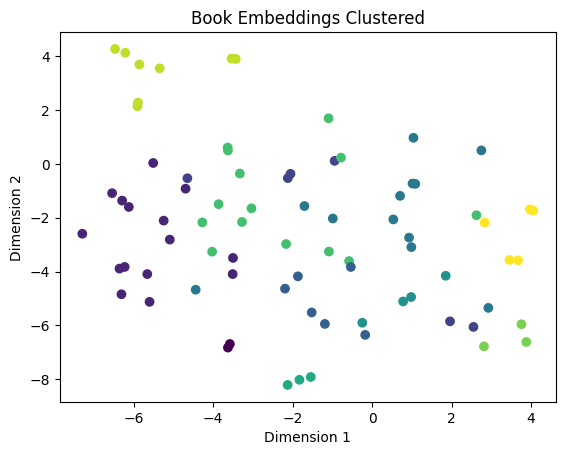

In [164]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Taking out the warnings
import warnings
from warnings import simplefilter

# Filter out FutureWarnings
simplefilter(action='ignore', category=FutureWarning)

# Convert the vectors list to a NumPy array
vectors = np.array(vectors)

# Perform t-SNE and reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(vectors)

# Plot the reduced data
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Book Embeddings Clustered')
plt.show()

In [165]:
# Find the closest embeddings to the centroids

# Create an empty list that will hold your closest points
closest_indices = []

# Loop through the number of clusters you have
for i in range(num_clusters):

    # Get the list of distances from that particular cluster center
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)

    # Find the list position of the closest one (using argmin to find the smallest distance)
    closest_index = np.argmin(distances)

    # Append that position to your closest indices list
    closest_indices.append(closest_index)

In [166]:
selected_indices = sorted(closest_indices)
selected_indices

[np.int64(3),
 np.int64(12),
 np.int64(13),
 np.int64(21),
 np.int64(26),
 np.int64(28),
 np.int64(40),
 np.int64(45),
 np.int64(49),
 np.int64(68),
 np.int64(75)]

In [167]:
llm3 = ChatOpenAI(temperature=0,
                 openai_api_key=OPENAI_API_KEY,
                 max_tokens=1000,
                 model='gpt-3.5-turbo'
                )

In [168]:
map_prompt = """
You will be given a single passage of a book. This section will be enclosed in triple backticks (```)
Your goal is to give a summary of this section so that a reader will have a full understanding of what happened.
Your response should be at least three paragraphs and fully encompass what was said in the passage.

```{text}```
FULL SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

In [169]:
map_chain = load_summarize_chain(llm=llm3,
                             chain_type="stuff",
                             prompt=map_prompt_template)

In [170]:
selected_docs = [docs[doc] for doc in selected_indices]

In [176]:
# Make an empty list to hold your summaries
summary_list = []

# Loop through a range of the lenght of your selected docs
for i, doc in enumerate(selected_docs):

    # Go get a summary of the chunk
    chunk_summary = map_chain.invoke([doc])

    # Append that summary to your list
    summary_list.append(chunk_summary['output_text'])

    #print (f"Summary #{i} (chunk #{selected_indices[i]}) - Preview: {chunk_summary[:250]} \n")
    print (f"Summary #{i} (chunk #{selected_indices[i]}) - Preview: {chunk_summary['output_text'][:250]} \n")

Summary #0 (chunk #3) - Preview: The passage describes the changing perceptions and popularity of climbing Mount Everest over the years. It begins with the British celebrating the coronation of Queen Elizabeth II and the successful ascent of Everest by a British team, which sparked  

Summary #1 (chunk #12) - Preview: In this passage, a climber named Tenzing falls into a crevasse on Everest, requiring a massive effort to be carried down to Base Camp due to the high altitude making helicopter evacuation unsafe. The importance of Sherpas in expeditions is emphasized 

Summary #2 (chunk #13) - Preview: In this passage, the author describes their journey to Everest Base Camp with their team, including Andy who falls ill with food poisoning. Despite feeling weak and dehydrated, Andy insists on continuing the trek to Base Camp. The group faces challen 

Summary #3 (chunk #21) - Preview: In this passage, we are introduced to two different stories of individuals attempting to climb Mount Evere

In [177]:
summaries = "\n".join(summary_list)

# Convert it back to a document
summaries = Document(page_content=summaries)

print (f"Your total summary has {llm.get_num_tokens(summaries.page_content)} tokens")

Your total summary has 3331 tokens


In [178]:
llm4 = ChatOpenAI(temperature=0,
                 openai_api_key=OPENAI_API_KEY,
                 max_tokens=3000,
                 model='gpt-4',
                 request_timeout=120
                )

In [179]:
combine_prompt = """
You will be given a series of summaries from a book. The summaries will be enclosed in triple backticks (```)
Your goal is to give a verbose summary of what happened in the story.
The reader should be able to grasp what happened in the book.

```{text}```
VERBOSE SUMMARY:
"""
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])

In [180]:
reduce_chain = load_summarize_chain(llm=llm4,
                             chain_type="stuff",
                             prompt=combine_prompt_template,verbose=True)

In [181]:
output = reduce_chain.invoke([summaries])



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

You will be given a series of summaries from a book. The summaries will be enclosed in triple backticks (```)
Your goal is to give a verbose summary of what happened in the story.
The reader should be able to grasp what happened in the book.

```The passage describes the changing perceptions and popularity of climbing Mount Everest over the years. It begins with the British celebrating the coronation of Queen Elizabeth II and the successful ascent of Everest by a British team, which sparked national pride and admiration. The passage then shifts to the 1963 ascent of Everest via the West Ridge by Tom Hornbein and Willi Unsoeld, highlighting the challenges they faced and the significance of their achievement. The narrator, who was a child at the time, was inspired by this event and developed a passion for climbing.

The passage delves into the narrator's personal journey as a climbe

In [182]:
output

{'input_documents': [Document(metadata={}, page_content='The passage describes the changing perceptions and popularity of climbing Mount Everest over the years. It begins with the British celebrating the coronation of Queen Elizabeth II and the successful ascent of Everest by a British team, which sparked national pride and admiration. The passage then shifts to the 1963 ascent of Everest via the West Ridge by Tom Hornbein and Willi Unsoeld, highlighting the challenges they faced and the significance of their achievement. The narrator, who was a child at the time, was inspired by this event and developed a passion for climbing.\n\nThe passage delves into the narrator\'s personal journey as a climber, detailing his early ambitions to climb Everest and his immersion in the climbing community. It discusses the evolving attitudes towards Everest, with some climbers dismissing it as lacking technical challenge and aesthetic appeal due to its popularity and commercialization. The passage als

In [183]:
output['output_text']

"The book provides a comprehensive account of the changing dynamics and challenges surrounding climbing Mount Everest. It begins by discussing the historical significance of the mountain, starting from the British ascent of Everest in 1953, which coincided with the coronation of Queen Elizabeth II, sparking national pride. The narrative then shifts to the 1963 ascent of Everest via the West Ridge by Tom Hornbein and Willi Unsoeld, emphasizing the challenges they faced and the significance of their achievement. The narrator, inspired by these events as a child, develops a passion for climbing and shares his personal journey as a climber.\n\nThe book delves into the evolving attitudes towards Everest, with some climbers dismissing it due to its popularity and commercialization. It discusses the impact of wealthy climbers like Dick Bass, who popularized guided ascents of Everest, changing the perception of who could climb the mountain. The increasing commercialization of Everest expeditio

In [184]:
print (output['output_text'])

The book provides a comprehensive account of the changing dynamics and challenges surrounding climbing Mount Everest. It begins by discussing the historical significance of the mountain, starting from the British ascent of Everest in 1953, which coincided with the coronation of Queen Elizabeth II, sparking national pride. The narrative then shifts to the 1963 ascent of Everest via the West Ridge by Tom Hornbein and Willi Unsoeld, emphasizing the challenges they faced and the significance of their achievement. The narrator, inspired by these events as a child, develops a passion for climbing and shares his personal journey as a climber.

The book delves into the evolving attitudes towards Everest, with some climbers dismissing it due to its popularity and commercialization. It discusses the impact of wealthy climbers like Dick Bass, who popularized guided ascents of Everest, changing the perception of who could climb the mountain. The increasing commercialization of Everest expeditions 

##Level 5: Agents - Summarize an unknown amount of text

In [185]:
from langchain import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain.utilities import WikipediaAPIWrapper

llm = ChatOpenAI(temperature=0, model_name='gpt-4', openai_api_key=OPENAI_API_KEY)

In [186]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=a35b2a5ccc8e02b1dd8aab18b523ad23c7a2fbbac95ed807d7538b78237de7b9
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [187]:
wikipedia = WikipediaAPIWrapper()

In [188]:
tools = [
    Tool(
        name="Wikipedia",
        func=wikipedia.run,
        description="Useful for when you need to get information from wikipedia about a single topic"
    ),
]

In [189]:
agent_executor = initialize_agent(tools, llm, agent='zero-shot-react-description', verbose=True)

In [190]:
output = agent_executor.invoke("Can you please provide a quick summary of Napoleon Bonaparte? \
                          Then do a separate search and tell me what the commonalities are with Serena Williams")



> Entering new AgentExecutor chain...
I need to first get a summary of Napoleon Bonaparte. Then, I will get a summary of Serena Williams. After that, I will compare the two summaries to find commonalities.
Action: Wikipedia
Action Input: Napoleon Bonaparte
Observation: Page: Napoleon
Summary: Napoleon Bonaparte (born Napoleone Buonaparte; 15 August 1769 – 5 May 1821), later known by his regnal name Napoleon I, was a French general and statesman who rose to prominence during the French Revolution and led a series of military campaigns across Europe during the French Revolutionary and Napoleonic Wars from 1796 to 1815. He led the French Republic as First Consul from 1799 to 1804, then ruled the French Empire as Emperor of the French from 1804 to 1814, and briefly again in 1815. He was King of Italy from 1805 to 1814 and Protector of the Confederation of the Rhine from 1806 to 1813.
Born on the island of Corsica to a family of Italian origin, Napoleon moved to mainland France in 1779 an

In [191]:
output

{'input': 'Can you please provide a quick summary of Napoleon Bonaparte?                           Then do a separate search and tell me what the commonalities are with Serena Williams',
 'output': 'Napoleon Bonaparte and Serena Williams are both considered among the greatest in their respective fields - military leadership for Napoleon and tennis for Serena. They have both achieved remarkable success and have left enduring legacies. They also faced significant challenges and setbacks in their careers, but demonstrated resilience and the ability to make comebacks.'}

In [192]:
output['output']

'Napoleon Bonaparte and Serena Williams are both considered among the greatest in their respective fields - military leadership for Napoleon and tennis for Serena. They have both achieved remarkable success and have left enduring legacies. They also faced significant challenges and setbacks in their careers, but demonstrated resilience and the ability to make comebacks.'

In [193]:
print (output)

{'input': 'Can you please provide a quick summary of Napoleon Bonaparte?                           Then do a separate search and tell me what the commonalities are with Serena Williams', 'output': 'Napoleon Bonaparte and Serena Williams are both considered among the greatest in their respective fields - military leadership for Napoleon and tennis for Serena. They have both achieved remarkable success and have left enduring legacies. They also faced significant challenges and setbacks in their careers, but demonstrated resilience and the ability to make comebacks.'}
